In [1]:
#TABLA 1 ZOTENKO
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
    
#grafico de nodos
def graficar(archive):

    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()
    
    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    nx.draw(g,node_size = 40,with_labels=False, font_weight='bold')
    plt.show()

graficar('tc02Data/yeast_AP-MS.txt')    
graficar('tc02Data/yeast_LIT.txt')
graficar('tc02Data/yeast_Y2H.txt')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
#2) Tabla 1
def data_de_red(archive):

    RTA=[]
    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])

    #Número de nodos
    N=g.number_of_nodes()

    #Número de enlaces
    L=g.number_of_edges()

    #Grado medio de la red
    k=[]
    for node in g.nodes:
        k.append(g.degree(node)) #El comando g.degree() calcula el grado como 
                                #si la red fuese no-dirigida
    km = sum(k)/len(k)  #valor medio de k  
    
    #Coeficiente de clustering

    Nodo_gnodo_vecino_gvecino_vecinossegundos=[] #Creo una lista con los nodos,  
    for nodo in g.nodes():                      #sus grados, sus vecinos, los 
        v=[]                                    #grados de sus vecinos y sus 
        for vecino in g.neighbors(nodo):        #vecinos segundos
            v2=[]
            for vecino2 in g.neighbors(vecino):
                v2.append(vecino2)
            gv=len(v2)
            v.append([vecino,gv,v2])
        gn=len(v)
        Nodo_gnodo_vecino_gvecino_vecinossegundos.append([nodo,gn,v])

    #Ahora calculo el <Ci>
    t=-1
    C=np.zeros(len(g.nodes()))

    #Calculo la cantidad de enlaces entre vecinos
    for n in Nodo_gnodo_vecino_gvecino_vecinossegundos:
        E = 0
        t=t+1
        for i in range(len(n[2])):
            for j in range(len(n[2])):
                for k in range(len(n[2][i][2])):
                    if n[2][i][2][k] == n[2][j][0]:
                        E = E + 1 #Cuento los enlaces entre vecinos del nodo n. 
                                  #Haciendo esto, se cuentan dos veces.

        if n[1] > 1: #Si el grado es menor o igual a 1, entonces el coeficiente 
                     #de clustering es nulo
            C[t]=E/(n[1]*(n[1]-1)) #Como es una red no dirigida, debería 
                                   #multiplicar por dos, pero ese factor esta 
                                   #contemplado en el numero de enlaces 
                                   #calculados dado que se repiten dos veces

    CPromedio=sum(C)/len(C)

    RTA.append([N, L, km, CPromedio])

    return RTA

AP = data_de_red('tc02Data/yeast_AP-MS.txt')
LIT = data_de_red('tc02Data/yeast_LIT.txt')
Y2H = data_de_red('tc02Data/yeast_Y2H.txt')
LIT_REGULY = data_de_red('tc02Data/yeast_LIT_Reguly.txt')

#TABLA
tabla_red = pd.DataFrame ({"Redes":["AP_MS","LIT","Y2H","LIT_Reguly"],
                           "Numero de Nodos":[AP[0][0],LIT[0][0],Y2H[0][0],LIT_REGULY[0][0]],
                           "Numero de Enlaces":[AP[0][1],LIT[0][1],Y2H[0][1],LIT_REGULY[0][1]],
                           "Grado Medio":[AP[0][2],LIT[0][2],Y2H[0][2],LIT_REGULY[0][2]],
                           "<Ci>":[AP[0][3],LIT[0][3],Y2H[0][3],LIT_REGULY[0][3]]})
print (tabla_red)

        Redes  Numero de Nodos  Numero de Enlaces  Grado Medio      <Ci>
0       AP_MS             1622               9070    11.183724  0.554636
1         LIT             1536               2925     3.808594  0.339892
2         Y2H             2018               2930     2.903865  0.153985
3  LIT_Reguly            12222              11859     1.940599  0.104464


In [3]:
#TABLA 2 ZOTENKO
#Creo una funcion que agarre los enlaces de cada nodo y los compare con las otras redes
LIT_REGULYY = ldata ('tc02Data/yeast_LIT_Reguly.txt')
LIT_REGULYYY = []
for i in range(1,len(LIT_REGULYY)):
    LIT_REGULYYY.append([LIT_REGULYY[i][0],LIT_REGULYY[i][1]])
#print(LIT_REGULYYY)

In [4]:
#2) Tabla2
def invertir(lista):
    rlista=[]
    for i in range(len(lista)):
        rlista.append(lista[len(lista)-1-i])
    return rlista

APP = ldata ('tc02Data/yeast_AP-MS.txt')
LITT = ldata ('tc02Data/yeast_LIT.txt')
Y2HH = ldata ('tc02Data/yeast_Y2H.txt')
LIT_REGULYY = ldata ('tc02Data/yeast_LIT_Reguly.txt')

LIT_REGULYYY = []
for i in range(1,len(LIT_REGULYY)):
    LIT_REGULYYY.append([LIT_REGULYY[i][0],LIT_REGULYY[i][1]])


def overlap(data1,data2,data3,data4):
    datas = [data1,data2,data3,data4]
    overlap_list = []
    for i in range(len(datas)):
        i_list=[]
        for j in range(i+1,len(datas)):
            count = 0
            for l in range (len(datas[i])):
                if datas[i][l] in datas[j]:
                    count = count + 1
                else:
                    invert = invertir(datas[i][l])
                    if invert in datas[j]:
                        count = count + 1
            i_list.append(count)
        overlap_list.append(i_list)
    return overlap_list


overlap_list = overlap(APP,LITT,Y2HH,LIT_REGULYYY)


In [5]:
#TABLA
tabla_red = pd.DataFrame ({"-":["AP_MS",overlap_list[0][0]/AP[0][1],overlap_list[0][1]/AP[0][1],overlap_list[0][2]/AP[0][1]],
                           "--":[overlap_list[0][0]/LIT[0][1],"LIT",overlap_list[1][0]/LIT[0][1],overlap_list[1][1]/LIT[0][1]],
                           "---":[overlap_list[0][1]/Y2H[0][1],overlap_list[1][0]/Y2H[0][1],"Y2H",overlap_list[2][0]/Y2H[0][1]],
                           "----":[overlap_list[0][2]/LIT_REGULY[0][1],overlap_list[1][1]/LIT_REGULY[0][1],overlap_list[2][0]/LIT_REGULY[0][1],"LIT_Reguly"]})
print (tabla_red)



           -         --        ---        ----
0      AP_MS   0.443761  0.0887372    0.212497
1   0.143109        LIT  0.0887372    0.241167
2  0.0286659  0.0888889        Y2H   0.0403913
3   0.277839   0.977778   0.163481  LIT_Reguly


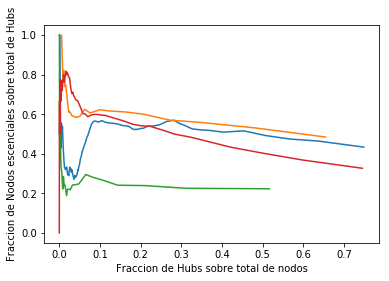

In [6]:
#2) Grafico 3
def asignar_esencialidad(data):
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
    #data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    N=g.number_of_nodes()
    
    k=[]
    for node in g.nodes:
        k.append(g.degree(node))
    
    kM = max(k)
    
    nodos=[]
          
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        nodos.append([node,'no escencial'])
        h=nodos.index([node,'no escencial'])
        for j in range(len(escen)):

            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                nodos[h][1]='escencial'
        
    frac_Hubs_total = []
    frac_Escen_Hubs = []
    for k in range(1,kM):#defino el kcutoff
        contadorH = 0
        contadorE = 0
        for node in nodos:
            #K_cutoff.append(0)
            if g.degree(node[0]) > k:
                contadorH = contadorH + 1
                if node[1] == 'escencial':
                    contadorE = contadorE + 1
                    
        frac_Hubs_total.append(contadorH/N)
        
        frac_Escen_Hubs.append(contadorE/contadorH)

    #print(frac_Hubs_total)
    #print(frac_Escen_Hubs)
    plt.plot(frac_Hubs_total,frac_Escen_Hubs)
    plt.xlabel('Fraccion de Hubs sobre total de nodos')
    plt.ylabel('Fraccion de Nodos escenciales sobre total de Hubs')


asignar_esencialidad(APP)
asignar_esencialidad(LITT)
asignar_esencialidad(Y2HH)
asignar_esencialidad(LIT_REGULYYY)

plt.show()


#dataAPP = asignar_esencialidad(APP)
#dataLIT = asignar_esencialidad(LITT)
#dataY2HH = asignar_esencialidad(Y2HH)
#dataLITREG = asignar_esencialidad(LIT_REGULYYY)

In [ ]:
#Analisis de vulnerabilidad
#Figura 3 Zotenko.

#Armo el grafo de cada set de datos.
def grafo (archive):
    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
    return g

#La V es de vulnerabilidad.
V_AP = grafo ('tc02Data/yeast_AP-MS.txt')
V_LIT = grafo ('tc02Data/yeast_LIT.txt')
V_Y2H = grafo ('tc02Data/yeast_Y2H.txt')
V_LIT_REGULY = grafo ('tc02Data/yeast_LIT_Reguly.txt')

#Extraigo la información del grado de cada nodo. En dos listas separadas para identificar al nodo con grado mas alto.
nodos_V_AP = []
grados_V_AP = []
for node in V_AP.nodes:
    nodos_V_AP.append (node)
    grados_V_AP.append (V_AP.degree(node))

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    
#Remuevo grado
#Modificando el valor central analizado, donde dice comp_gig.degree se pueden analizar eigenvalue y shortest-path.
def impacto_grado (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
        indice_nodo_grado_mayor = grados.index(max(grados))
        comp_gig.remove_node(nodos[indice_nodo_grado_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#REMOVE RANDOM
def impacto_random (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
        nodo = random.choice(nodos) #elijo nodo aleatoriamente
        comp_gig.remove_nodes_from([nodo])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#REMOVE ESSENTIAL
def impacto_escencial (archive):
#--------------------------------------asigno escencialidad a los nodos-------------------------------------------------
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt') 
    Nodos_de_red_original = []
    Nodos_escenciales_original = []     
    for node in archive.nodes():
        archive.node[node]['escencialidad']='no escencial'
        Nodos_de_red_original.append([node,'no escencial'])
        h=Nodos_de_red_original.index([node,'no escencial'])
        for j in range(len(escen)):
            
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                archive.node[node]['escencialidad']='escencial'
                Nodos_de_red_original[h][1]='escencial'
                Nodos_escenciales_original.append(node)
                
#Creo una lista de nodos escenciales
#-------------------------------------------------------------------------------------------------------------------
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    nodos_escenciales = Nodos_escenciales_original
    while len (nodos_escenciales) > 1: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        nodos_escenciales = []
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
            if node in Nodos_escenciales_original:
                nodos_escenciales.append(node)
        nodo = random.choice(nodos_escenciales) #elijo nodo escencial aleatoriamente
        comp_gig.remove_nodes_from([nodo])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                              #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Impacto eigenvector
def impacto_eigenvector (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        eigenvector = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            eigenvector.append (nx.eigenvector_centrality(comp_gig)[node])
        indice_nodo_autovector_mayor = eigenvector.index(max(grados))
        comp_gig.remove_node(nodos[indice_nodo_autovector_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Ver el impacto del betweenness.
def impacto_bet (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    #print (nx.betweenness_centrality(comp_gig)["YNL301C"])
    print (len (comp_gig))
    while len (comp_gig) > 970: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        bet = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            #print (nodos)
            #print (bet)
            bet.append (nx.betweenness_centrality(comp_gig)[node])        
        indice_nodo_bet_mayor = bet.index(max(bet))
        comp_gig.remove_node(nodos[indice_nodo_bet_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

pruebagrado = impacto_grado (V_AP)

plt.plot(pruebagrado[0],pruebagrado[1],'r')
plt.xlabel('Fraccion de nodos extraidos')
plt.ylabel('Fraccion de nodos que quedan')


pruebaescencial = impacto_escencial (V_AP)

plt.plot(pruebaescencial[0],pruebaescencial[1],'b')
plt.xlabel('Fraccion de nodos extraidos')
plt.ylabel('Fraccion de nodos que quedan')


pruebagrado = impacto_random (V_AP)

plt.plot(pruebagrado[0],pruebagrado[1],'k')
plt.xlabel('Fraccion de nodos extraidos')
plt.ylabel('Fraccion de nodos que quedan')

pruebavector = impacto_eigenvector (V_AP)

plt.plot(pruebavector[0],pruebavector[1],'k')
plt.xlabel('Fraccion de nodos extraidos')
plt.ylabel('Fraccion de nodos que quedan')

plt.show ()


#Creeria que esta bien, el grafico no me gusta mucho igual.

#Para nodos aleatoriamente esta en la linea de arriba (32).


#gonzauri@gmail.com

#Para la extraccion de proteinas escenciales.

In [ ]:
import random
#FIGURA 2.B HE
#CALCULO ALFA
#Para eso, tengo que calcular la distribucion del numero de interacciones entre proteinas escenciales (IBEP) 
# en redes recableadas aleatoriamente. Siendo n el nro de interacciones escenciales (essential PPI) y N el nro
#total de enlaces en la red, alfa=(n-m)/N

#Agarro la red y la recableo 10000 veces , calculando m en cada recableado
def recableado_random(g)
    
    nodos=[]
    #Asigno escencialidad
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        nodos.append([node,'no escencial'])
        h=nodos.index([node,'no escencial'])
        for j in range(len(escen)):

            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                nodos[h][1]='escencial'
    
    #Calculo el m de la red original
    lista_de_m = []
    m = 0
    for enlace in nuevos_edges:
        if g.node[enlace[0]]['escencialiad'] == 'escencial' and g.node[enlace[1]]['escencialiad'] == 'escencial':
            m = m + 1
    lista_de_m.append(m)

    # nx.draw(g,node_size = 40,with_labels=True, font_weight='bold')
    # plt.show()
    #Lista de nodos con grados ordenada de mayor a menor sin nodos con grado cero
    nodo_grados=[]
    for node in g.nodes:
        nodo_grados.append([node,g.degree[node]])
        if g.degree(node) == 0:
            nodo_grados.remove([node,g.degree[node]])
    nodo_grados.sort(key=lambda grado: grado[1], reverse=True)

    #Arranca el recableado

    #PASOS A SEGUIR
    #I)   Tengo una lista con los nodos y sus grados
    #II)  agarro el nodo de grado mas alto
    #III) lo voy recableando y redefiniendo grados de sus nodos vecinos (para cada nuevo vecino conectado a este nodo, su grado se reduce en 1)
    #IV)  una vez recableado, rehago la lista de nodos y grados, eliminando a este nodo de la lista, y con los grados del resto redefinidos,
    #     y repito

    for _ in range(10):
        nuevos_edges=[]
        while len(nodo_grados)>1: #(II)
            while nodo_grados[0][1] > 0:
                nuevo_vecino = random.choice(nodo_grados[1:])
                if [nodo_grados[0][0],nuevo_vecino[0]] not in nuevos_edges: #(III)
                    nuevo_vecino[1] = nuevo_vecino[1] - 1
                    nodo_grados[0][1] = nodo_grados[0][1] -1
                    nuevos_edges.append([nodo_grados[0][0],nuevo_vecino[0]]) #mi nueva lista de enlaces puede tener menos enlaces que la original, pero no sera significativo
                    if nuevo_vecino[1] == 0:
                        nodo_grados.remove(nuevo_vecino)
            nodo_grados.remove(nodo_grados[0]) #(IV)
            nodo_grados.sort(key=lambda grado: grado[1], reverse=True) #Reordeno la lista con los nodos redefinidos y con los nodos con k = 0 fuera

        #me fijo cuantos enlaces escenciales tengo
        m = 0
        for enlace in nuevos_edges:
            if g.node[enlace[0]]['escencialiad'] == 'escencial' and g.node[enlace[1]]['escencialiad'] == 'escencial':
                m = m + 1
        lista_de_m.append(m)

#CREO QUE TENGO QUE LEER MEJOR LA PARTE QUE HABLA DE LOS IBEP Y PPI ESCENCIALES PORQUE NO ESTARIA ENTENDIENDO
#COMO UN IBEP NO ES PPI ESCENCIAL





In [ ]:
data=[['gonza','pablo'],['yoda','obi'],['pancho','obi'],['carlitos','pablo'],['gonza','pancho'],['gonza','carlitos'],['obi','carlitos'],['obi','braulio']]
g = nx.Graph ()
g = g.to_undirected()

for i in range (len(data)):
    g.add_nodes_from (data[i])
    g.add_edge (data[i][0],data[i][1])


In [ ]:
#TABLA 3 DE ZOTENKO
#PASOS
#creo una lista con los nodos escenciales de la componente gigante
#creo una lista con los grados de los nodos escenciales
#remuevo los nodos escenciales de la componente gigante y rearmo el grafo con los nodos restantes
#analizo la nueva componente gigante
#
#elijo de forma aleatoria nodos no escenciales tales que tenga una misma cantidad que escenciales y misma distribucion de grado

### el autovalor de mi matriz de adyacencia tiene asociado un autovector. Las n posiciones de mi autovector me dan la centralidad de cada uno de esos nodos en la red. Entonces, lo que hago es buscar el autovalor mas alto y busco el nodo correspondiente (dentro del autovector asociado) de centralidad mas alta

In [ ]:
#Impacto eigenvector
def impacto_eigenvector (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        eigenvector = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            eigenvector.append (nx.eigenvector_centrality(comp_gig)[node])
        indice_nodo_autovector_mayor = eigenvector.index(max(eigenvector))
        comp_gig.remove_node(nodos[indice_nodo_autovector_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++
pruebavector = impacto_eigenvector (V_AP)

plt.plot(pruebavector[0],pruebavector[1],'k')
plt.xlabel('Fraccion de nodos extraidos')
plt.ylabel('Fraccion de nodos que quedan')

plt.show ()

In [ ]:
#TABLA 3 ZOTENKO
#REMOVE ESSENTIAL
def impacto_escencial_total (archive):
#--------------------------------------asigno escencialidad a los nodos-------------------------------------------------
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt') 
    Nodos_de_red_original = []
    Nodos_escenciales_y_grado = []     
    for node in archive.nodes():
        archive.node[node]['escencialidad']='no escencial'
        Nodos_de_red_original.append([node,'no escencial'])
        h=Nodos_de_red_original.index([node,'no escencial'])
        for j in range(len(escen)):
            
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                archive.node[node]['escencialidad']='escencial'
                Nodos_de_red_original[h][1]='escencial'
                Nodos_escenciales_y_grado.append([node,archive.degree(node)])#Lista con grados de cada nodo escencial
                
#-------------------------------------------------------------------------------------------------------------------
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    Ninicial = int (comp_gig.number_of_nodes())
    nodos_escenciales_en_comp_gig = 0
    for node in Nodos_escenciales_y_grado:
        if node[0] in comp_gig.nodes:
            comp_gig.remove_nodes_from(node[0])
            nodos_escenciales_en_comp_gig = nodos_escenciales_en_comp_gig + 1
            comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
    
    Nfinal = int (comp_gig.number_of_nodes())
    x = nodos_escenciales_en_comp_gig/Ninicial
    y = float (Nfinal)/float (Ninicial)

        
    todo = [x,y]
    return todo

prueba = impacto_escencial_total(V_AP)
prueba

#ESTO ESTA MAL: Y NO PUEDE DAR 1 PORQUE SIGNIFICA QUE NFINAL=NINICIAL

In [ ]:
#TABLA 3 ZOTENKO
#REMOVE ESSENTIAL
def impacto_escencial_total (archive):
#--------------------------------------asigno escencialidad a los nodos-------------------------------------------------
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt') 
    Nodos_de_red_original = []
    Nodos_escenciales_y_grado = []     
    for node in archive.nodes():
        archive.node[node]['escencialidad']='no escencial'
        Nodos_de_red_original.append([node,'no escencial'])
        h=Nodos_de_red_original.index([node,'no escencial'])
        for j in range(len(escen)):
            
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                archive.node[node]['escencialidad']='escencial'
                Nodos_de_red_original[h][1]='escencial'
                Nodos_escenciales_y_grado.append([node,archive.degree(node)])#Lista con grados de cada nodo escencial
                
#-------------------------------------------------------------------------------------------------------------------
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    Ninicial = int (comp_gig.number_of_nodes())
    nodos_escenciales_en_comp_gig = 0
    lista=list(comp_gig.nodes)
    return lista

prueba = impacto_escencial_total(V_AP)
prueba

### 